In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading the CSV file data for Aerofit
aerofit_data = pd.read_csv("C:\\Users\\Dell\\Downloads\\aerofit_treadmill.csv")
aerofit_data.head()                       

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
# Cheking the Dataset info
aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Finding the number of rows and columns given in the dataset

In [9]:
aerofit_data.shape

(180, 9)

Checking for the missing values and find the number of missing values in each column

In [10]:
aerofit_data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Checking Duplicate values in the dataset

In [11]:
aerofit_data.duplicated().value_counts()

False    180
Name: count, dtype: int64

Checking the unique values for columns

In [12]:
for i in aerofit_data.columns:
    print(f'Unique Values in {i} column are :-\n {aerofit_data[i].unique()}\n')
    print('.'*80)

Unique Values in Product column are :-
 ['KP281' 'KP481' 'KP781']

................................................................................
Unique Values in Age column are :-
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

................................................................................
Unique Values in Gender column are :-
 ['Male' 'Female']

................................................................................
Unique Values in Education column are :-
 [14 15 12 13 16 18 20 21]

................................................................................
Unique Values in MaritalStatus column are :-
 ['Single' 'Partnered']

................................................................................
Unique Values in Usage column are :-
 [3 2 4 5 6 7]

................................................................................
Unique Values in Fitness column are :-
 [4 3 2 1 5]

........

Checking the number of unique values for columns

In [13]:
for i in aerofit_data.columns:
    print('Number of Unique Values in',i,'column :', aerofit_data[i].nunique())
    print('-'*70)

Number of Unique Values in Product column : 3
----------------------------------------------------------------------
Number of Unique Values in Age column : 32
----------------------------------------------------------------------
Number of Unique Values in Gender column : 2
----------------------------------------------------------------------
Number of Unique Values in Education column : 8
----------------------------------------------------------------------
Number of Unique Values in MaritalStatus column : 2
----------------------------------------------------------------------
Number of Unique Values in Usage column : 6
----------------------------------------------------------------------
Number of Unique Values in Fitness column : 5
----------------------------------------------------------------------
Number of Unique Values in Income column : 62
----------------------------------------------------------------------
Number of Unique Values in Miles column : 37
-----------------

# INSIGHTS & OBSERVATIONS -
From the above analysis, the observation is :

Total number of rows and columns are 180 and 9 respectively.
Product, Gender and Marital Status columns have object datatype
Age, Education, Usage, Miles, Fitness, Income have Integer datatype
we can see there are no duplicate entries in the dataset
Number of Unique Values in
Product - 3
Age - 32
Gender - 2
Education - 8
Marital Status - 2
Usage - 6
Fitness - 5
Income - 62
Miles - 37

In [14]:
# Statistical summary of All columns
aerofit_data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Detect Outliers
Finding the outliers for every continuous variable in the dataset

In [15]:
continuous_var = ['Age', 'Income', 'Usage', 'Fitness', 'Miles']

In [16]:
arr = {'5th percentile': 5, '25th percentile or Q1': 25, '50th percentile or Q2': 50, '75th percentile or Q3': 75,
       '95th percentile': 95}

In [17]:
for key, value in arr.items():
    for var in continuous_var:
        print(f'{var} -> {key} : {np.percentile(aerofit_data[var], value):.2f}')

Age -> 5th percentile : 20.00
Income -> 5th percentile : 34053.15
Usage -> 5th percentile : 2.00
Fitness -> 5th percentile : 2.00
Miles -> 5th percentile : 47.00
Age -> 25th percentile or Q1 : 24.00
Income -> 25th percentile or Q1 : 44058.75
Usage -> 25th percentile or Q1 : 3.00
Fitness -> 25th percentile or Q1 : 3.00
Miles -> 25th percentile or Q1 : 66.00
Age -> 50th percentile or Q2 : 26.00
Income -> 50th percentile or Q2 : 50596.50
Usage -> 50th percentile or Q2 : 3.00
Fitness -> 50th percentile or Q2 : 3.00
Miles -> 50th percentile or Q2 : 94.00
Age -> 75th percentile or Q3 : 33.00
Income -> 75th percentile or Q3 : 58668.00
Usage -> 75th percentile or Q3 : 4.00
Fitness -> 75th percentile or Q3 : 4.00
Miles -> 75th percentile or Q3 : 114.75
Age -> 95th percentile : 43.05
Income -> 95th percentile : 90948.25
Usage -> 95th percentile : 5.05
Fitness -> 95th percentile : 5.00
Miles -> 95th percentile : 200.00


In [18]:
for var in continuous_var:
    # Calculate the IQR for the variable
    Q1 = np.percentile(aerofit_data[var], arr['25th percentile or Q1'])
    Q3 = np.percentile(aerofit_data[var], arr['75th percentile or Q3'])
    percentile_95 = np.percentile(aerofit_data[var], arr['95th percentile'])
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers for the variable
    outliers = aerofit_data[(aerofit_data[var] < lower_threshold) | (aerofit_data[var] > upper_threshold)]

    # Calculate the percentage of outliers
    outlier_percentage = round(len(outliers) / len(aerofit_data[var]) * 100, 2 )

    # Output the percentage of outliers
    print(f"IQR for {var}: {IQR}")
    print(f"Outlier above this Q3 {var} : {upper_threshold}")
    print(f"Percentage of outliers for {var}: {outlier_percentage}% \n")

IQR for Age: 9.0
Outlier above this Q3 Age : 46.5
Percentage of outliers for Age: 2.78% 

IQR for Income: 14609.25
Outlier above this Q3 Income : 80581.875
Percentage of outliers for Income: 10.56% 

IQR for Usage: 1.0
Outlier above this Q3 Usage : 5.5
Percentage of outliers for Usage: 5.0% 

IQR for Fitness: 1.0
Outlier above this Q3 Fitness : 5.5
Percentage of outliers for Fitness: 1.11% 

IQR for Miles: 48.75
Outlier above this Q3 Miles : 187.875
Percentage of outliers for Miles: 7.22% 



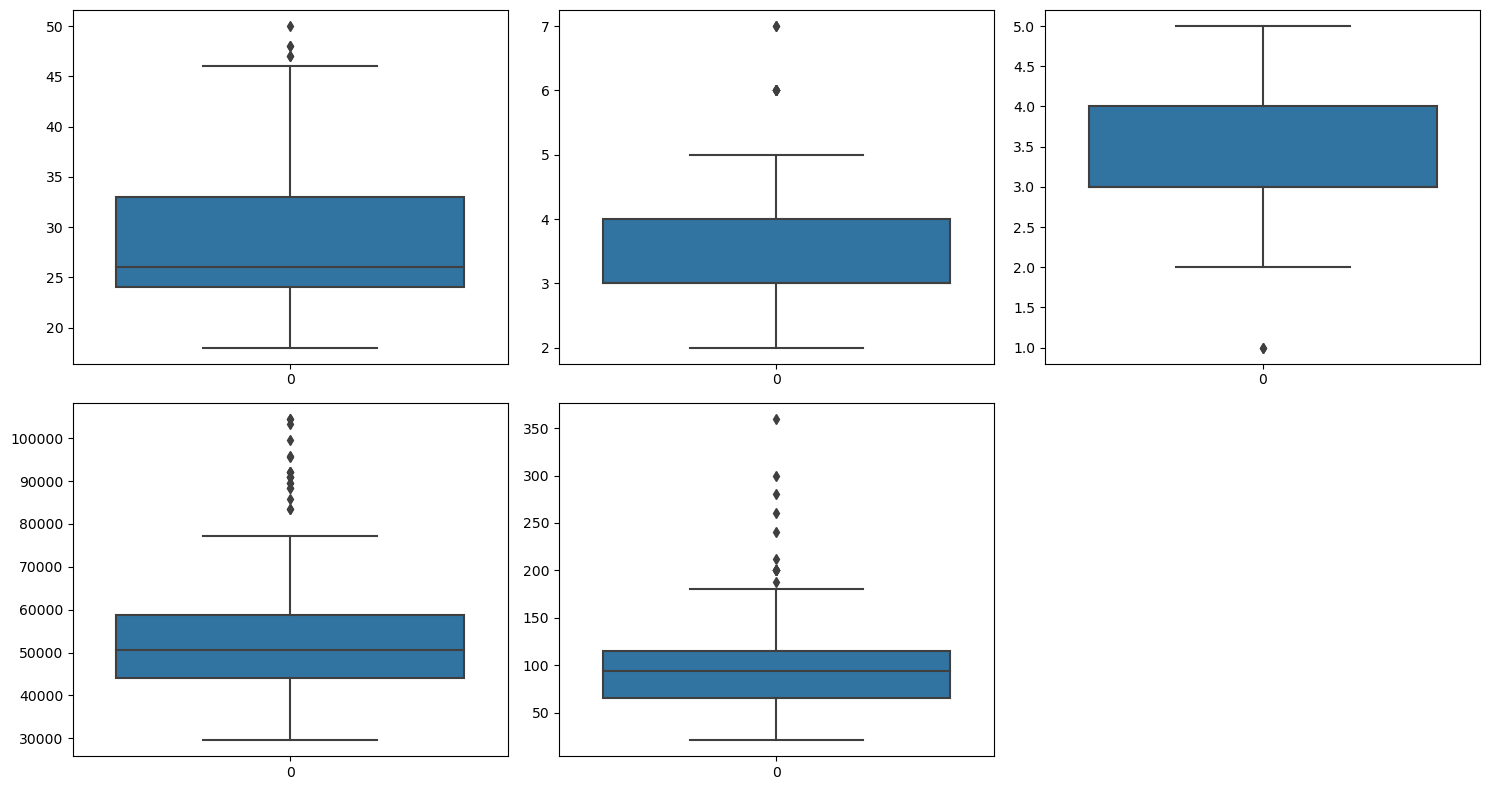

In [19]:
plt.figure(figsize=(15,8))

# Box Plot for Age
plt.subplot(2,3,1)
sns.boxplot(aerofit_data['Age'])

# Box Plot for Usage
plt.subplot(2,3,2)
sns.boxplot(aerofit_data['Usage'])

#Box Plot for Fitness
plt.subplot(2,3,3)
sns.boxplot(aerofit_data['Fitness'])

#Box Plot for Income
plt.subplot(2,3,4)
sns.boxplot(aerofit_data['Income'])

#Box Plot for Miles
plt.subplot(2,3,5)
sns.boxplot(aerofit_data['Miles'])

plt.tight_layout()
plt.show()

# INSIGHTS & OBSERVATIONS -
Based on this graphical representation, it is evident that both Income and Miles have a huge number of outliers. In contrast, the remaining variables display only a minor presence of outliers as compared to them.

Least percentage of outliers are in Age with 2.78%
Large percentage of outliers are in Income with 10.56%
Remove/clip the data between the 5 percentile and 95 percentile

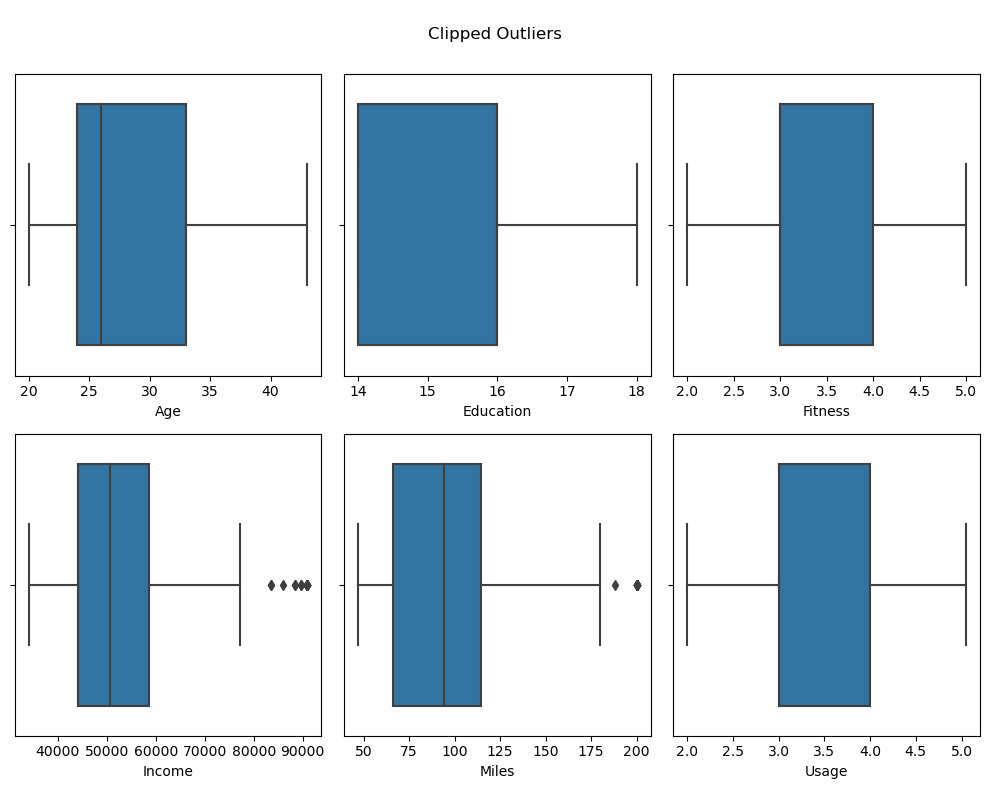

In [20]:
clipped_age = np.clip(aerofit_data['Age'], np.percentile(aerofit_data['Age'], 5), np.percentile(aerofit_data['Age'], 95))
clipped_education = np.clip(aerofit_data['Education'], np.percentile(aerofit_data['Education'], 5), np.percentile(aerofit_data['Education'], 95))
clipped_income = np.clip(aerofit_data['Income'], np.percentile(aerofit_data['Income'], 5), np.percentile(aerofit_data['Income'], 95))
clipped_usage = np.clip(aerofit_data['Usage'], np.percentile(aerofit_data['Usage'], 5), np.percentile(aerofit_data['Usage'], 95))
clipped_miles = np.clip(aerofit_data['Miles'], np.percentile(aerofit_data['Miles'], 5), np.percentile(aerofit_data['Miles'], 95))

clipped_fitness = np.clip(aerofit_data['Fitness'], np.percentile(aerofit_data['Fitness'], 5), np.percentile(aerofit_data['Fitness'], 95))

fig,ax=plt.subplots(2,3,figsize=(10,8))
fig.suptitle("\nClipped Outliers\n")

plt.subplot(2,3,1)
sns.boxplot(data=aerofit_data,x=clipped_age)

plt.subplot(2,3,2)
sns.boxplot(data=aerofit_data,x=clipped_education)

plt.subplot(2,3,3)
sns.boxplot(data=aerofit_data,x=clipped_fitness)

plt.subplot(2,3,4)
sns.boxplot(data=aerofit_data,x=clipped_income)

plt.subplot(2,3,5)
sns.boxplot(data=aerofit_data,x=clipped_miles)

plt.subplot(2,3,6)
sns.boxplot(data=aerofit_data,x=clipped_usage)

plt.tight_layout()
plt.show()

# Non-Graphical Analysis: Value counts

In [21]:
categorical_columns= ['Product', 'Gender', 'MaritalStatus']

In [22]:
# Non-graphical analysis: Value counts for each categorical variable
for column in categorical_columns:
    print(f"{aerofit_data[column].value_counts()}\n")

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64



# Gaphical : Univariate & Bivariate analysis

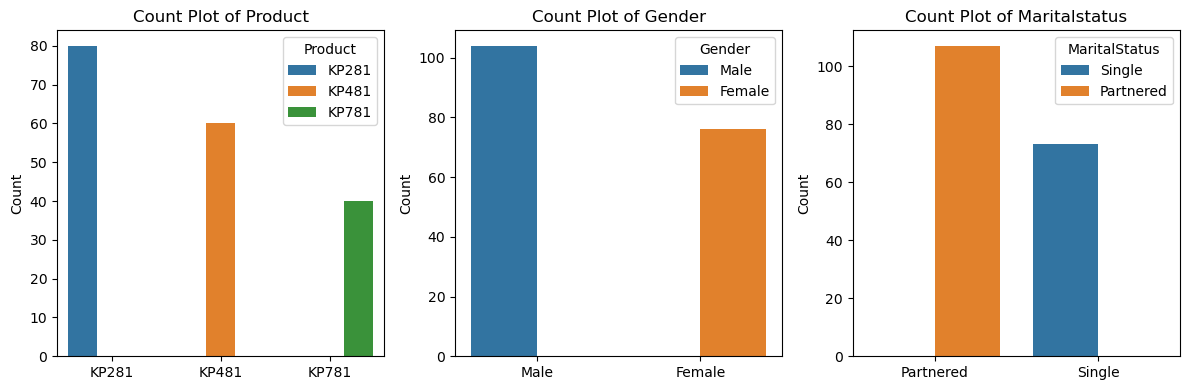

In [23]:
# Countplots for each categorical variable
fig,axes = plt.subplots(1, 3,figsize=(12, 4))
for i, column in enumerate(categorical_columns):
    order = aerofit_data[column].value_counts().index[:10]
    sns.countplot(x=column, data=aerofit_data, order=order, ax=axes[i], hue=column)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='y',labelsize=10)
    axes[i].tick_params(axis='x',labelsize=10)
plt.tight_layout()
plt.show()

In [24]:
continuous_var = ['Age', 'Education', 'Income', 'Usage', 'Fitness', 'Miles']

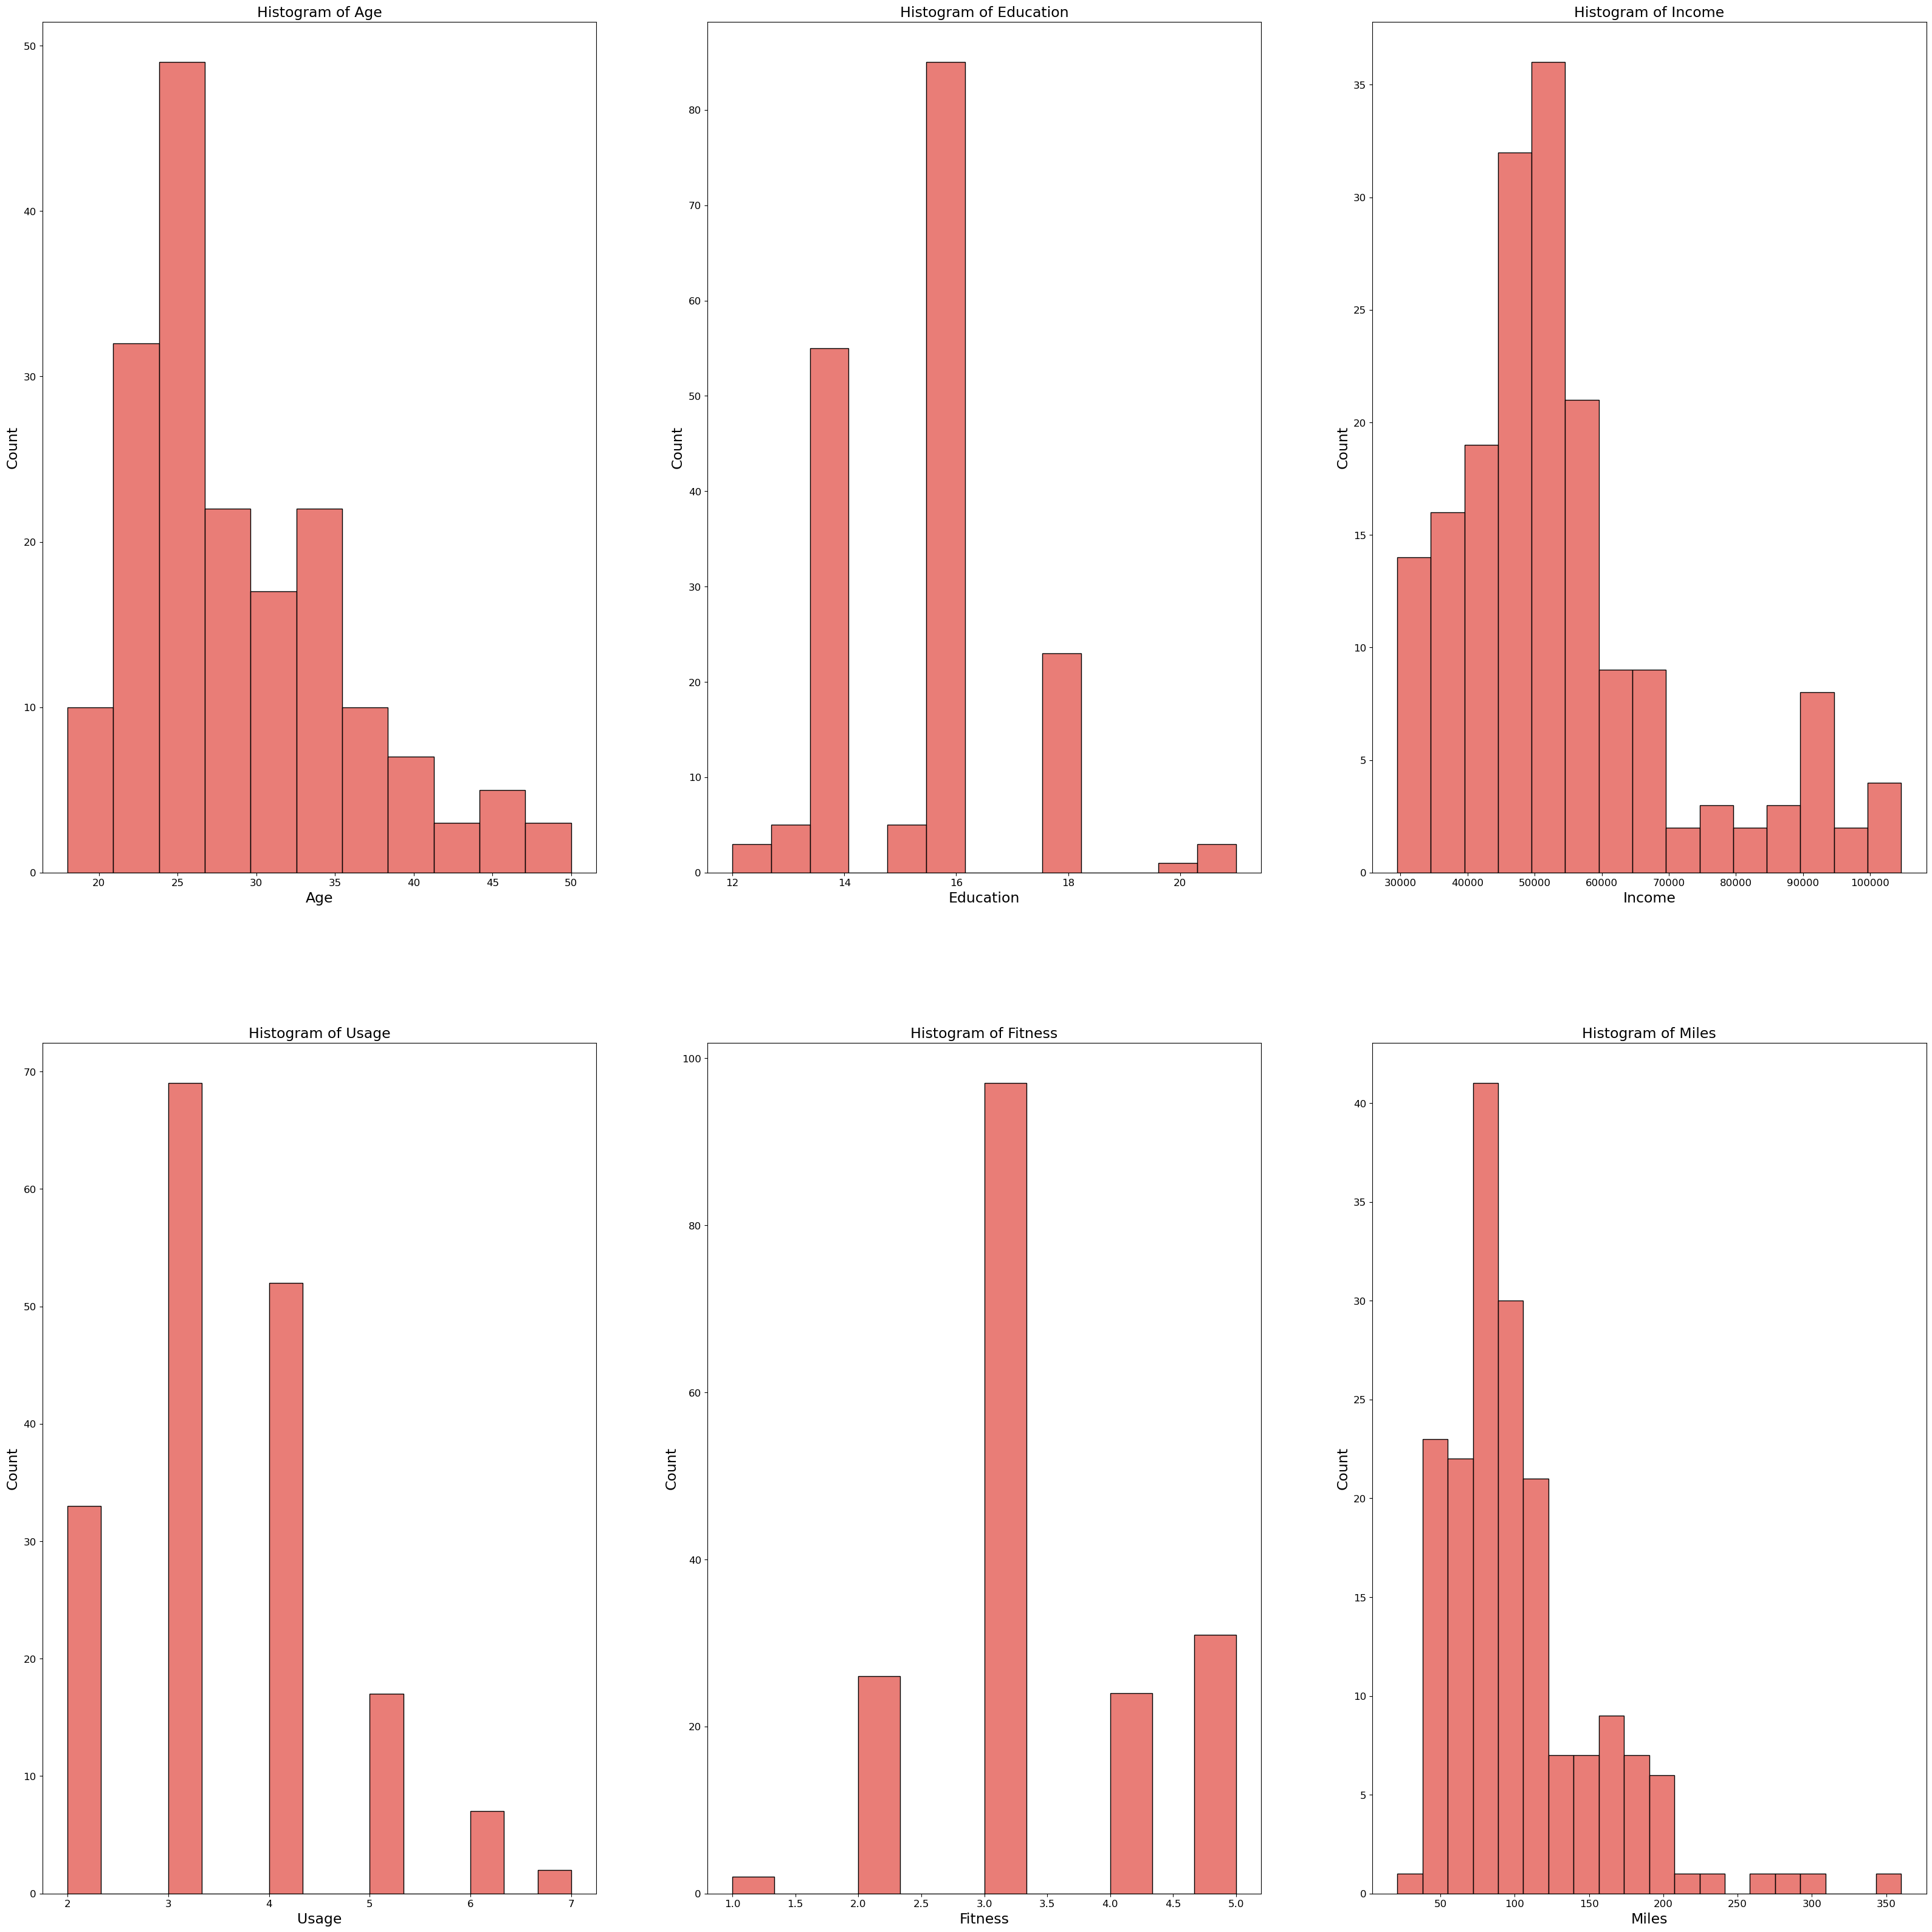

In [25]:
# Hisplot for Continuous Variable
sns.set_palette('Spectral')
fig, axes = plt.subplots(2,3, figsize=(40, 40))
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.histplot(aerofit_data[column], ax=axes[i])
    axes[i].set_title(f'Histogram of {column.capitalize()}', fontsize= 17)
    axes[i].set_ylabel('Count', fontsize=17)
    axes[i].set_xlabel(column.capitalize(), fontsize=17 )
    axes[i].tick_params(axis='both', labelsize=12)

plt.show()

# Checking if features like marital status, Gender, and age have any effect on the product purchased
Finding if there is any relationship between the categorical variables and the output variable in the data.

In [26]:
aerofit_data.groupby('MaritalStatus')['Product'].value_counts()
aerofit_data.groupby('Gender')['Product'].value_counts()
aerofit_data.groupby('Age')['Product'].value_counts()

Age  Product
18   KP281      1
19   KP281      3
     KP481      1
20   KP481      3
     KP281      2
               ..
47   KP781      1
     KP281      1
48   KP481      1
     KP781      1
50   KP281      1
Name: count, Length: 68, dtype: int64

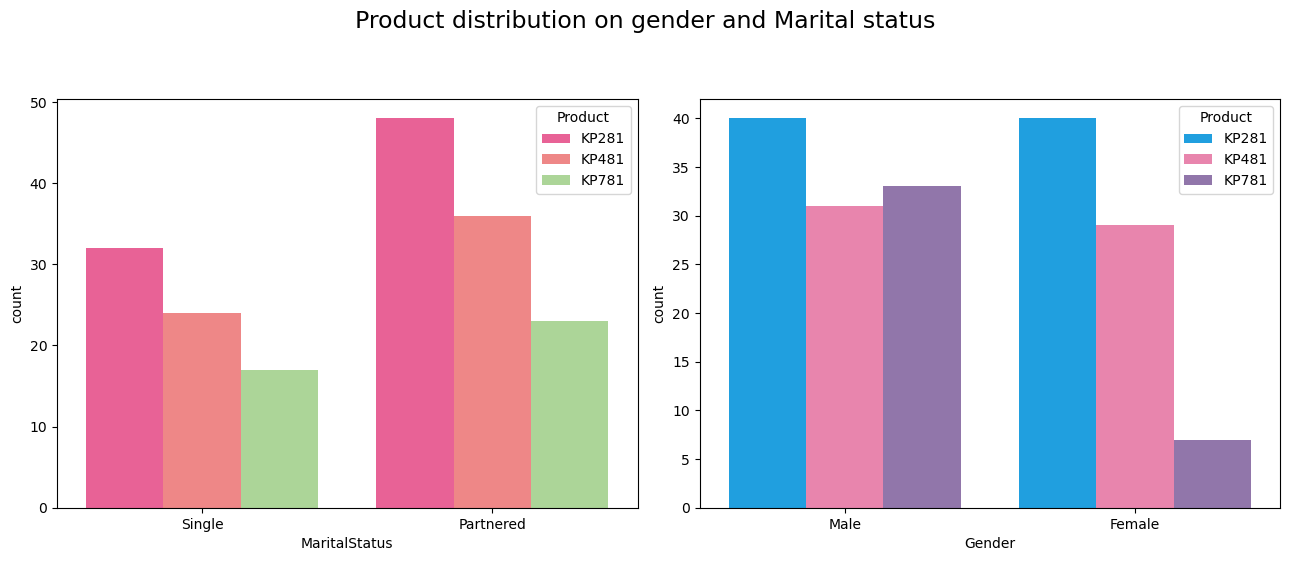

In [27]:
plt.figure(figsize =(13,10))
plt.suptitle('Product distribution on gender and Marital status\n\n', fontsize=17)

plt.subplot(2,2,1)
sns.countplot(data = aerofit_data, x='MaritalStatus', hue='Product', palette=['#FF4B91', '#FF7676', '#A8DF8E'])

plt.subplot(2,2,2)
sns.countplot(data = aerofit_data, x='Gender', hue='Product', palette=['#00A9FF', '#F875AA', '#916DB3'])

plt.tight_layout()
plt.show()

# INSIGHTS & OBSERVATIONS -
From the Graphical and Non-graphical Univariate analysis, we can see that there are highest number of customers are male customers compared to female customers. Moreover, partnered customers are more prevalent. We can also conclude that product KP281 is the most frequently purchased by customers whose self-rated fitness is 3 which means they are moderate - fitness individuals.

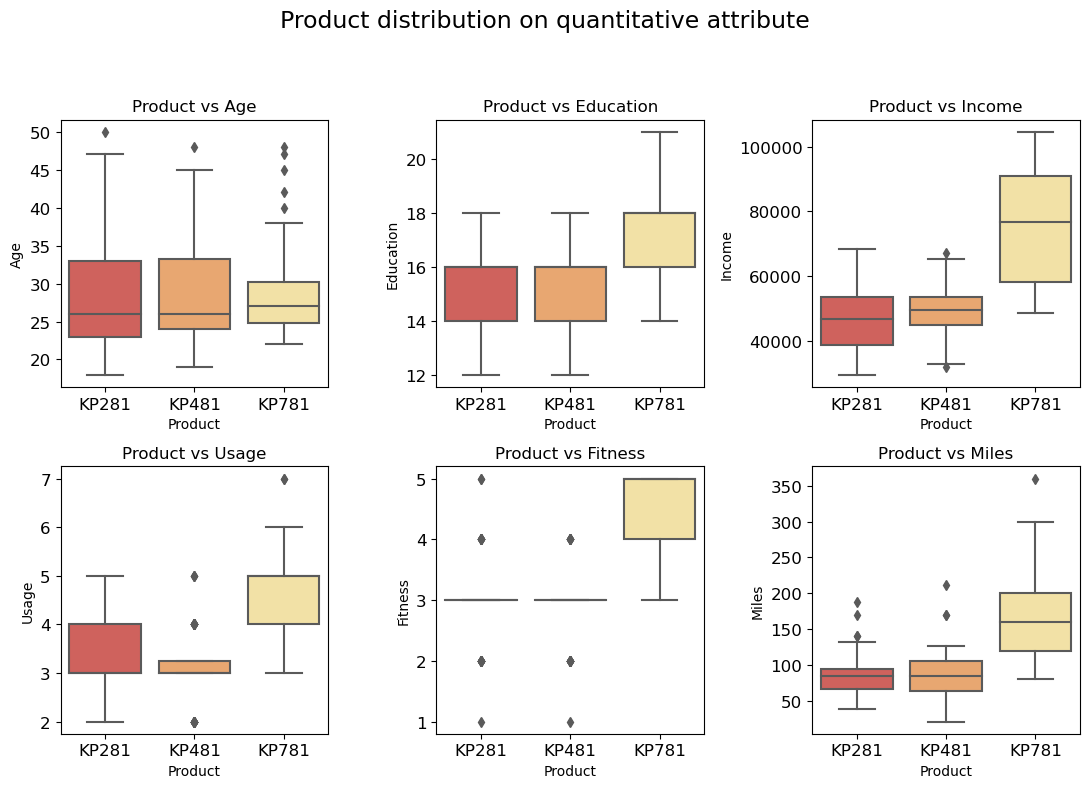

In [28]:
# Product distribution on quantitative attribute
fig,axes = plt.subplots(2,3,figsize=(11,8))
plt.suptitle('Product distribution on quantitative attribute\n\n', fontsize=17)
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.boxplot(y=aerofit_data[column], x =aerofit_data['Product'],ax=axes[i])
    axes[i].set_title(f'Product vs {column.capitalize()}')
    axes[i].tick_params(axis='y',labelsize=12)
    axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

# INSIGHTS & OBSERVATIONS -
Product vs Age
- Customers purchasing products KP281 & KP481 are having same Age median value.
- Customers whose age lies between 25-30, are more likely to buy KP781 product

Product vs Education
- Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
- While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

Product vs Usage
- Customers who plan to use the treadmill more than 4 times a week are more likely to purchase the KP781 product.

Product vs Fitness
- Customers who are more fit (fitness level of 3 or higher) have a higher chance of purchasing the KP781 product.

Product vs Income
- Customers with a higher income (income of $60,000 or more) are more likely to purchase the KP781 product.

Product vs Miles
- Customers who expect to walk or run more than 120 miles per week are more likely to buy the KP781 product.

# Multivariate Analysis

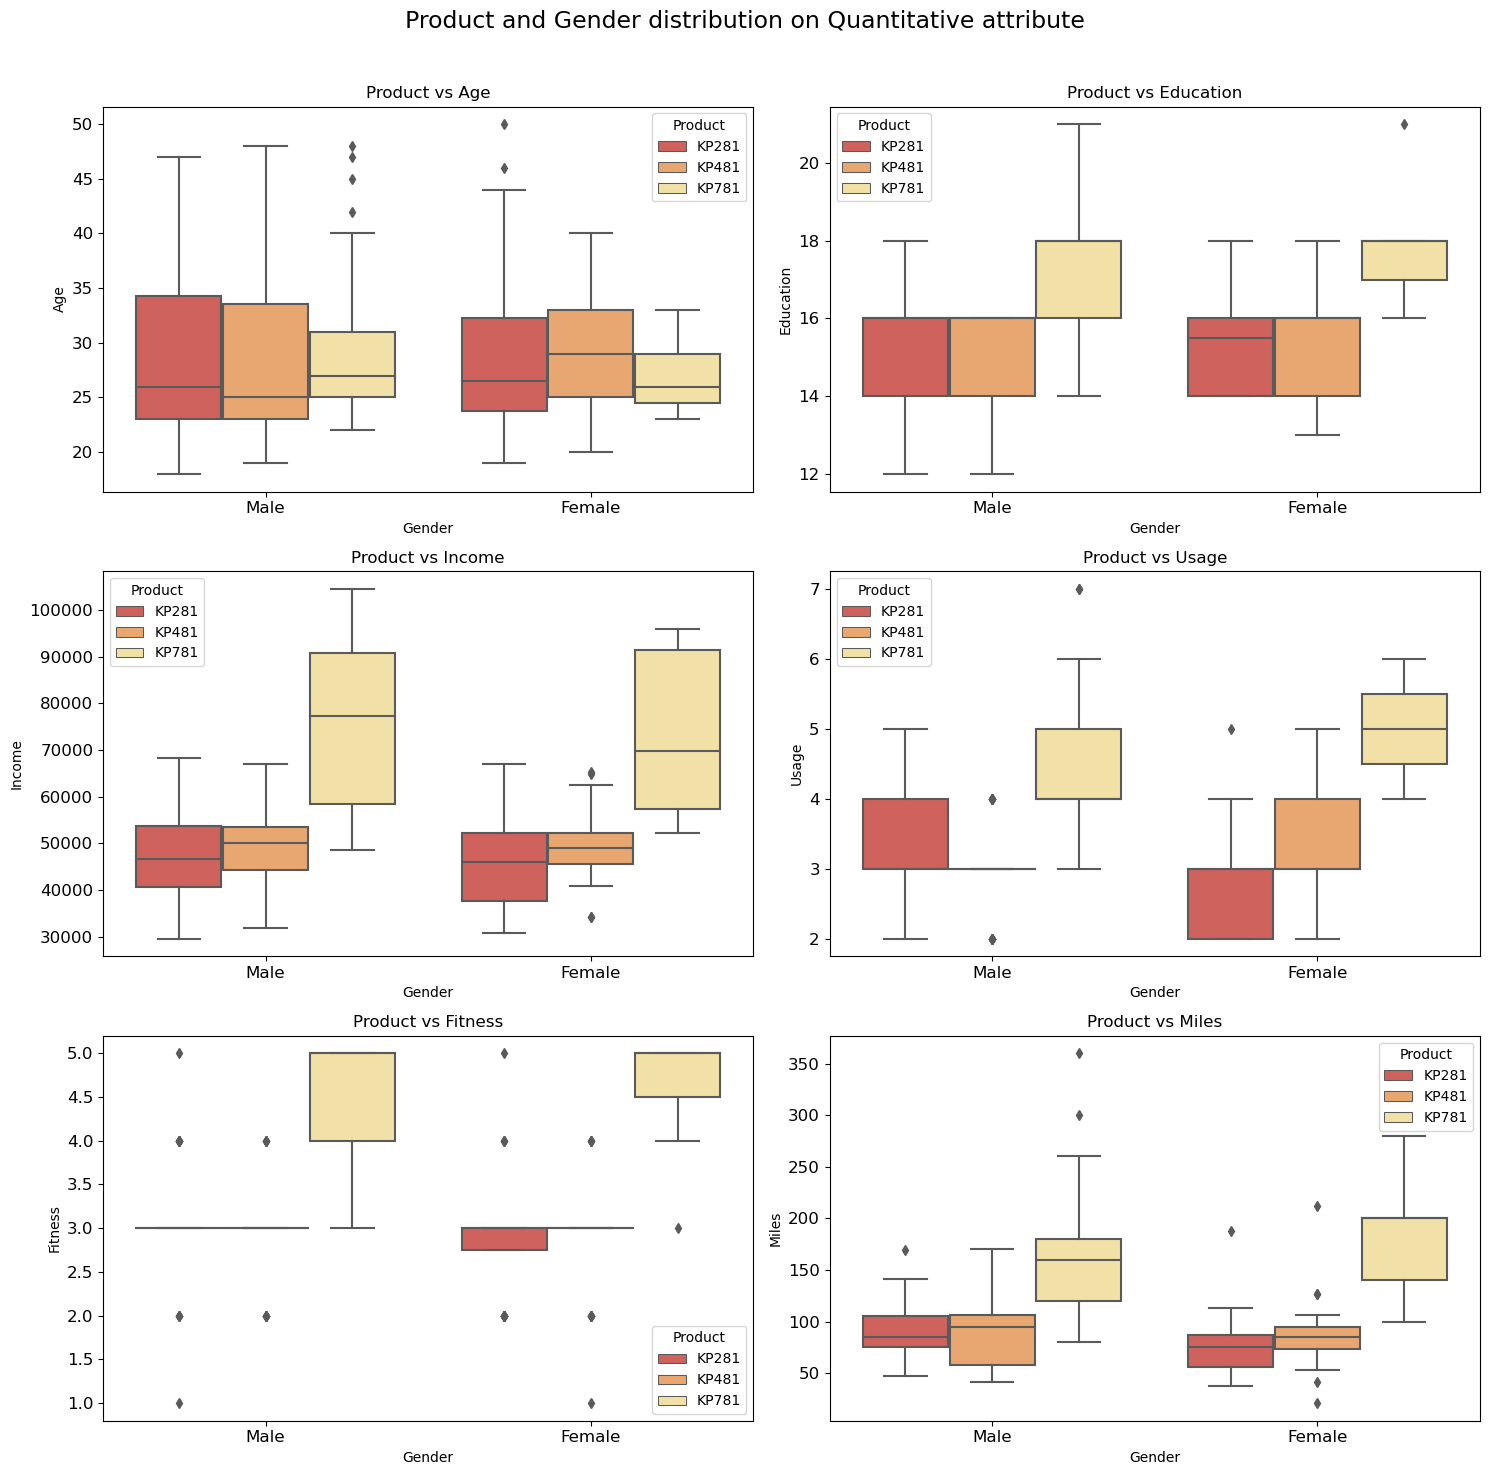

In [29]:
fig,axes = plt.subplots(3,2,figsize=(15,15))
plt.suptitle('Product and Gender distribution on Quantitative attribute\n\n', fontsize=17)
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.boxplot(y=aerofit_data[column], x =aerofit_data['Gender'],ax=axes[i], hue=aerofit_data['Product'])
    axes[i].set_title(f'Product vs {column.capitalize()}')
    axes[i].tick_params(axis='y',labelsize=12)
    axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

# INSIGHTS & OBSERVATIONS -
- Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

# Representing the Probability
Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [30]:
#METHOD 1
marginal_probability = aerofit_data['Product'].value_counts() / len(aerofit_data['Product'])*100
round(marginal_probability,2)

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: count, dtype: float64

In [31]:
#METHOD 2
marginal_probability= aerofit_data['Product'].value_counts(normalize=True)*100
marginal_probability

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

In [32]:
#METHOD 3
marginal_probability_crosstab = pd.crosstab(aerofit_data['Product'],'count')
# Calculating the total number of customers
total_customers = marginal_probability_crosstab.sum().iloc[0]

# Calculating the marginal probability for each product
marginal_probability = round((marginal_probability_crosstab / total_customers) * 100, 2)
marginal_probability

col_0,count
Product,
KP281,44.44
KP481,33.33
KP781,22.22


# INSIGHTS & OBSERVATIONS: 
- Based on the provided data, it seems that the KP281 treadmill is the most popular, followed by the KP481 and then the KP781.
- Approximately 44.44% of customers prefer the KP281, 33.33% prefer the KP481, and 22.22% prefer the KP781.
- Customers who plan to use the treadmill more than 4 times a week may be more inclined to choose the KP781, as it has a higher likelihood of being purchased.
- Similarly, customers who have a higher fitness level (3 or above) may also be more likely to choose the KP781.
- A higher income (equal to or greater than $60,000) may also be a factor in customers choosing the KP781 over the other options.
- Additionally, customers who expect to walk or run more than 120 miles per week may also show a preference for the KP781.
- These insights can be useful for marketing and product positioning strategies, as they highlight potential target segments for each treadmill product.

Find the probability that the customer buys a product based on each column.

In [33]:
#binning the age values into categories

age_bin = [17,25,35,45,float('inf')]
bin_labels = ['17-25', '25-35', '35-45', '45+']
aerofit_data['age_group'] = pd.cut(aerofit_data['Age'],bins = age_bin ,labels = bin_labels)

# binning the income values into categories
income_bin = [0,40000,60000,80000,float('inf')]
income_bin_labels = ['Low Income','Moderate Income','High Income','Very High Income']

aerofit_data['Income_Range'] = pd.cut(aerofit_data['Income'],bins = income_bin ,labels = income_bin_labels)

# binning the miles values into categories
miles_range = [0,70,100,200,float('inf')]
miles_bin_label = ['Light', 'Moderate', 'Active', 'Fitness Enthusiast ']
aerofit_data['miles_group'] = pd.cut(aerofit_data['Miles'],bins = miles_range,labels = miles_bin_label)

In [34]:
# Calculate the probability of buying a product based on each column
probability_of_buy = {}

for column in aerofit_data.columns:
    if column not in ( 'Product', 'Age', 'Income', 'Miles'):
        probability_of_buy[column] = pd.crosstab(index=aerofit_data['Product'], columns=aerofit_data[column], margins =True, normalize=True).round(2)

# Display the probabilities
for column, prob in probability_of_buy.items():
    print(f"\nProbability of buying a product based on {column}:")
    print('-' * 70)
    print(f'{prob}\n')


Probability of buying a product based on Gender:
----------------------------------------------------------------------
Gender   Female  Male   All
Product                    
KP281      0.22  0.22  0.44
KP481      0.16  0.17  0.33
KP781      0.04  0.18  0.22
All        0.42  0.58  1.00


Probability of buying a product based on Education:
----------------------------------------------------------------------
Education    12    13    14    15    16    18    20    21   All
Product                                                        
KP281      0.01  0.02  0.17  0.02  0.22  0.01  0.00  0.00  0.44
KP481      0.01  0.01  0.13  0.01  0.17  0.01  0.00  0.00  0.33
KP781      0.00  0.00  0.01  0.00  0.08  0.11  0.01  0.02  0.22
All        0.02  0.03  0.31  0.03  0.47  0.13  0.01  0.02  1.00


Probability of buying a product based on MaritalStatus:
----------------------------------------------------------------------
MaritalStatus  Partnered  Single   All
Product                           

# INSIGHTS & OBSERVATIONS-
Based on the probabilities, we can observe the following insights:

- Gender: Probability of purchasing a particular product based on gender, we can see that there are highest number of customers are male customers compared to female customers.

- Education: Customers with education level 14 (some college education) have the highest probability of purchasing the KP281 treadmill.

KP281: 
- Customers with education levels 16 (graduate degree) and 18 (professional degree) also show a relatively high probability of purchasing KP281.

KP481:
- Customers with education level 14 (some college education) have the highest probability of purchasing the KP481 treadmill.
- Customers with education level 16 (graduate degree) and 18 (professional degree) also show a relatively high probability of purchasing KP481.

KP781:
- Customers with education level 18 (professional degree) have the highest probability of purchasing the KP781 treadmill.
- Customers with education levels 15 (college degree) and 16 (graduate degree) also show a relatively high probability of purchasing KP781.

Overall, customers with higher education levels (such as graduate degrees and professional degrees) tend to have a higher probability of purchasing all three treadmill products. However, customers with some college education (education level 14) also show a significant probability for both KP281 and KP481.

- Marital Status: Partnered customers have a higher probability of purchasing all three treadmill products compared to single customers.

- Usage: Customers who plan to use the treadmill 3-4 times a week have a higher probability of purchasing the KP281 treadmill. Those who plan to use it 5+ times a week have a higher probability of purchasing the KP781 treadmill.

- Fitness: Customers with higher fitness levels (3-5) have a higher probability of purchasing the KP281 treadmill. Customers with lower fitness levels (1-2) have a higher probability of purchasing the KP781 treadmill. [0,70,100,200]

1. For customers with a lifestyle of Light Activity (0 to 70 miles per week), the overall probability of purchasing any treadmill is 26%. However, the conditional probabilities for specific models are as follows:

- KP281: 16%
- KP481: 10%
- KP781: 0%

2. For customers with a lifestyle of Moderate Activity (71 to 100 miles per week), the overall probability of purchasing any treadmill is 38%. The conditional probabilities for specific models are:

- KP281: 19%
- KP481: 14%
- KP781: 4%

3. For customers with an Active Lifestyle (100 to 200 miles per week), the overall probability of purchasing any treadmill is 33%. The conditional probabilities for specific models are:

- KP281: 10%
- KP481: 8%
- KP781: 15%
4. For customers who are Fitness Enthusiasts (more than 200 miles per week), the overall probability of purchasing any treadmill is only 3%, which is relatively low compared to other lifestyle categories.

In summary, the probabilities indicate how likely customers with different activity lifestyles are to purchase specific treadmill models.

- Age Group: Customers in the age group 17-25 have a higher probability of purchasing the KP281 treadmill. Other age groups show similar probabilities for all three products.

- Income Range: Moderate and high-income customers have a higher probability of purchasing the KP281 and KP481 treadmills, while low-income customers have a higher probability of purchasing the KP781 treadmill. Very high-income customers have a higher probability of purchasing the KP781 and KP481 treadmills.

- Miles Group: Customers who categorize themselves as fitness enthusiasts have a higher probability of purchasing the KP781 treadmill. Other miles groups show similar probabilities for all three products.

- These insights can be useful for targeted marketing strategies, product development, and pricing decisions.

Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

In [35]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid Gender value."
    df1 = pd.crosstab(aerofit_data['Gender'], columns=[aerofit_data['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(aerofit_data):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(aerofit_data):.2f}\n")
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



# INSIGHTS & OBSERVATIONS -
- Among male customers, there is a higher probability of purchasing KP281 compared to KP781 or KP481.
- Among female customers, there is a higher probability of purchasing KP281 compared to KP481, but the probability of purchasing KP781 is the lowest.
- The conditional probabilities provide insights into the likelihood of customers purchasing specific products based on their gender.

# Check the correlation among different factors
Find the correlation between the given features in the table.

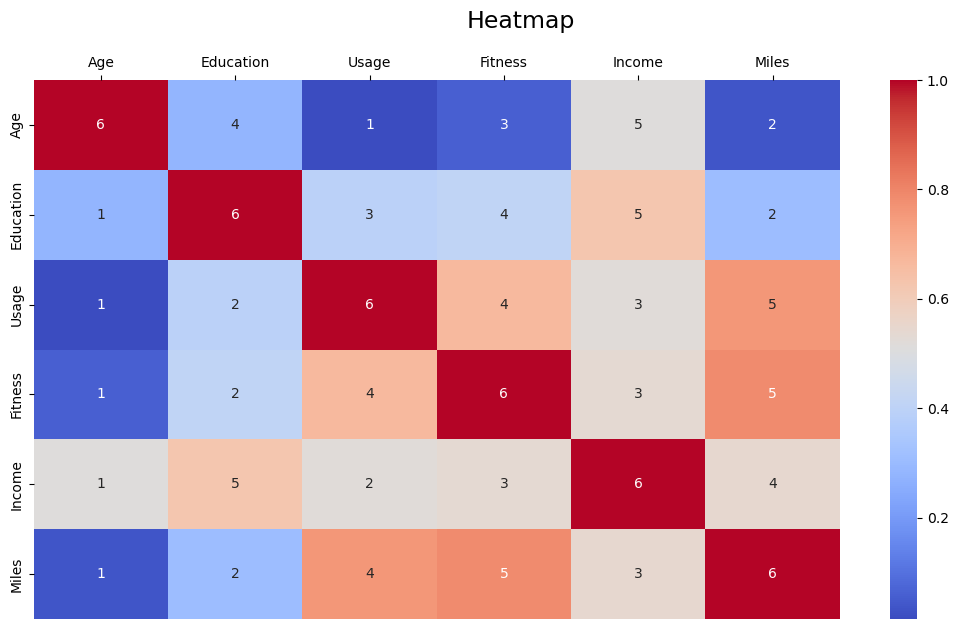

In [36]:
correlation_matrix = aerofit_data.corr(method='pearson', numeric_only = True)

# Display the heatmap of the correlation matrix:
plt.figure(figsize=(13,7))
plt.suptitle('Heatmap', fontsize= 17)
sns.heatmap(correlation_matrix, annot=correlation_matrix.rank(axis="columns"), cmap='coolwarm').xaxis.tick_top()
plt.show()

C:\Users\Dell\Downloads\ANA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


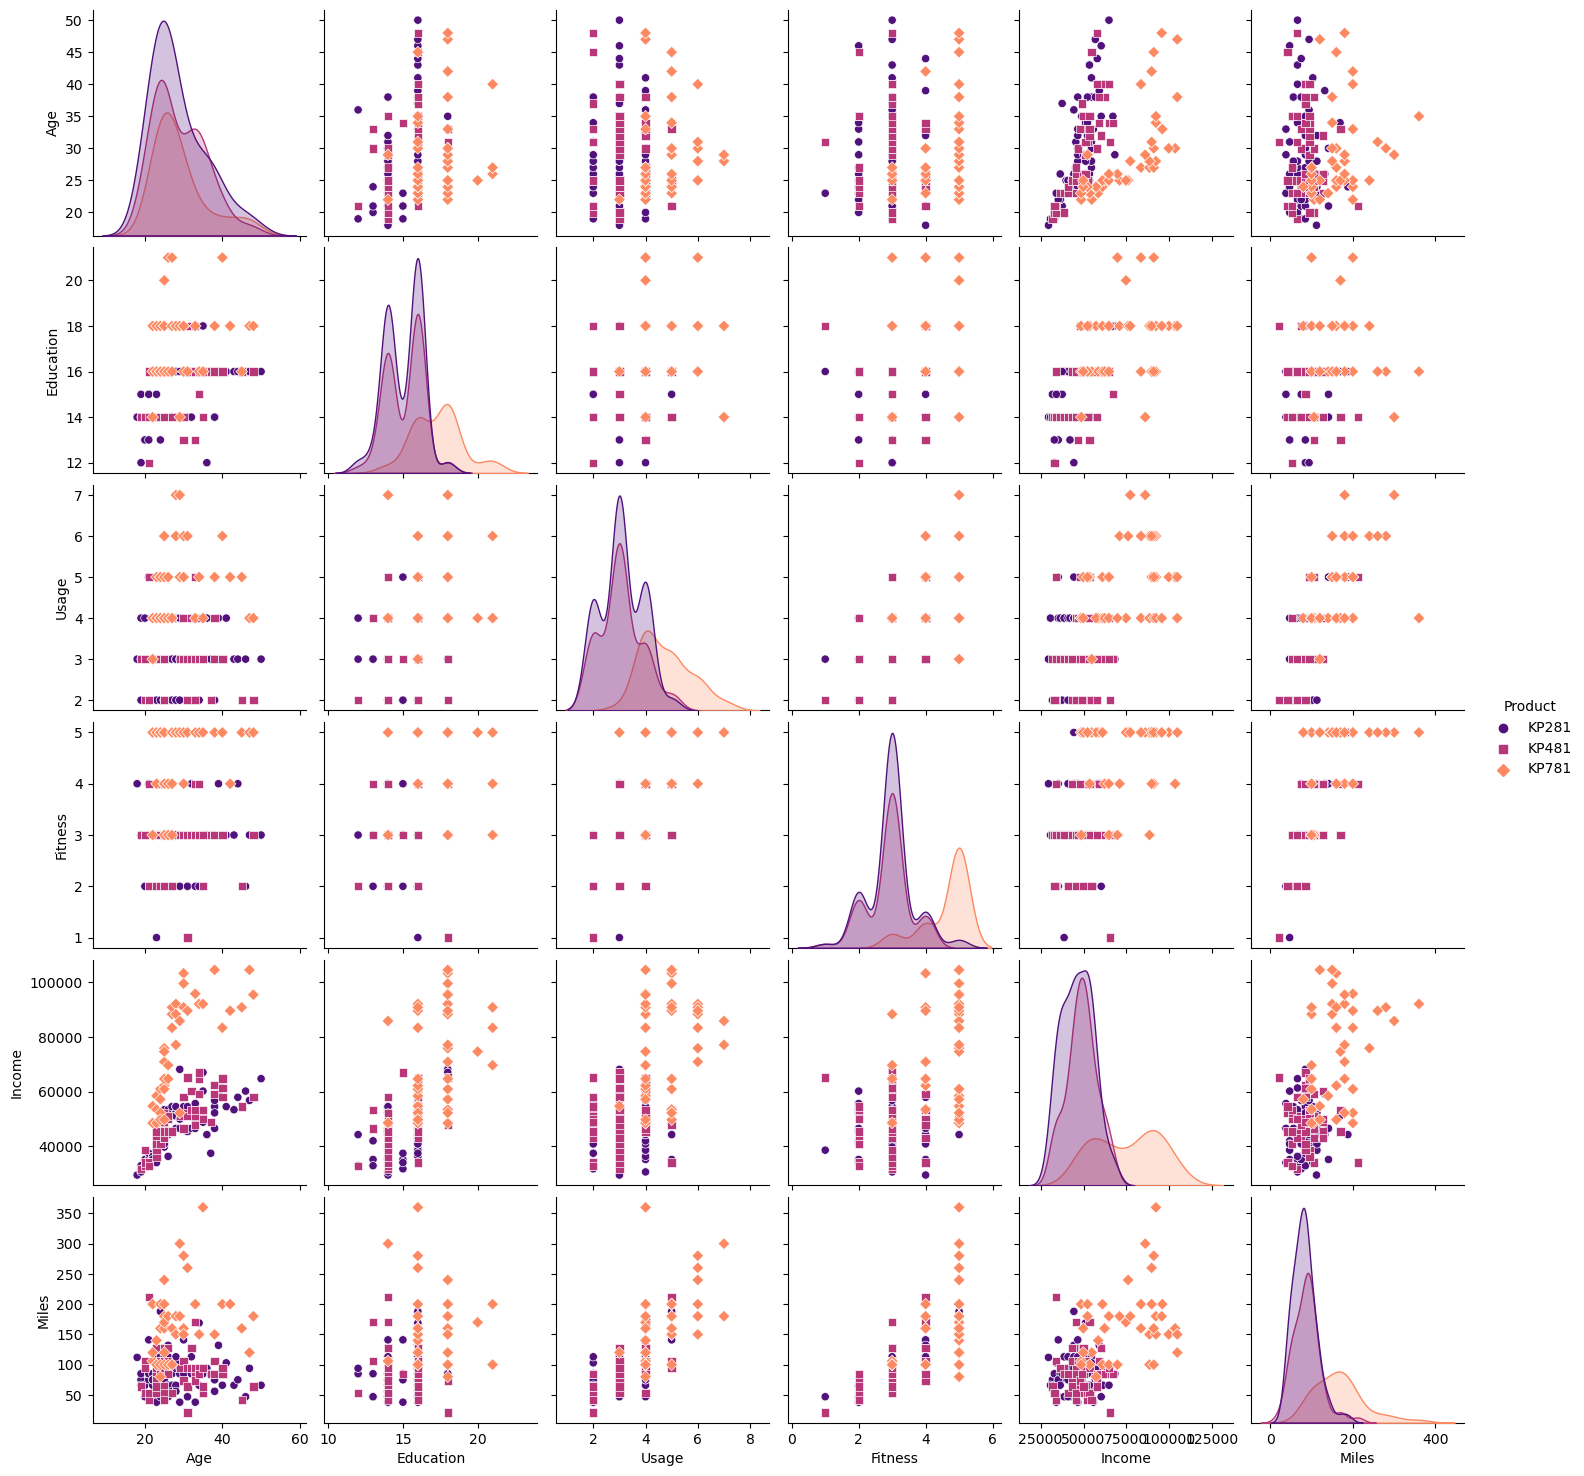

In [37]:
# Display the Pairplot of the correlation matrix:
sns.pairplot(aerofit_data, hue ='Product', palette= 'magma', markers=["o", "s", "D"])
plt.show()

# INSIGHTS & OBSERVATIONS -
From the pair plot and heatmap, it is evident that there is a positive correlation between Age and Income. This means that as Age increases, Income also tends to increase, and vice versa.

Similarly, Education and Income are also strongly correlated. This is expected, as higher levels of education often lead to higher income levels.

Furthermore, there is a significant correlation between Education and factors such as Fitness rating and Usage of the treadmill. This means that individuals with higher education levels tend to have better fitness ratings and use the treadmill more frequently.

Additionally, the Usage of the treadmill shows a strong correlation with Fitness and Miles. This implies that the more someone uses the treadmill, the higher their fitness level tends to be, and they are likely to cover more distance in terms of miles.

In simple terms, these observations suggest that Age and Income, as well as Education and Income, are positively related. Moreover, Education has a considerable influence on Fitness rating and Usage of the treadmill. Lastly, more usage of the treadmill is associated with better fitness and covering more distance.

INSIGHTS & OBSERVATIONS -
From the pair plot and heatmap, it is evident that there is a positive correlation between Age and Income. This means that as Age increases, Income also tends to increase, and vice versa.

Similarly, Education and Income are also strongly correlated. This is expected, as higher levels of education often lead to higher income levels.

Furthermore, there is a significant correlation between Education and factors such as Fitness rating and Usage of the treadmill. This means that individuals with higher education levels tend to have better fitness ratings and use the treadmill more frequently.

Additionally, the Usage of the treadmill shows a strong correlation with Fitness and Miles. This implies that the more someone uses the treadmill, the higher their fitness level tends to be, and they are likely to cover more distance in terms of miles.

In simple terms, these observations suggest that Age and Income, as well as Education and Income, are positively related. Moreover, Education has a considerable influence on Fitness rating and Usage of the treadmill. Lastly, more usage of the treadmill is associated with better fitness and covering more distance.

The analysis reveals several important insights:

1. Usage and Fitness Connection: There is a strong positive correlation between usage of fitness equipment and fitness level. This means that individuals who use fitness equipment more frequently tend to have higher fitness levels. In other words, the more someone uses the treadmill, the fitter they are likely to be.

2. Income Influence: Income has notable associations with both education and miles covered. This implies that customers with higher incomes may have pursued more education and might prefer treadmills that offer longer mileage. In other words, higher-income individuals may be more likely to invest in higher-quality treadmills that allow them to cover more distance.

3. Age's Limited Influence: The analysis shows that age has relatively weak correlations with other variables. This suggests that age alone may not strongly influence factors like income, fitness level, or usage patterns. Other factors, such as income and education, may have a greater impact on these variables.

4. Education's Role: Education has a significant influence on several factors. It correlates positively with income, indicating that individuals with higher education levels may earn more. Additionally, education is moderately correlated with fitness level and usage. This suggests that individuals with higher education levels are more likely to engage in fitness activities and use fitness equipment regularly.

Overall, these findings highlight the importance of usage, income, and education in understanding fitness and purchasing patterns. Regular usage, higher income, and higher education levels are associated with higher fitness levels and potentially greater interest in advanced treadmill features.

# Customer profiling and recommendation
Make customer profilings for each and every product.

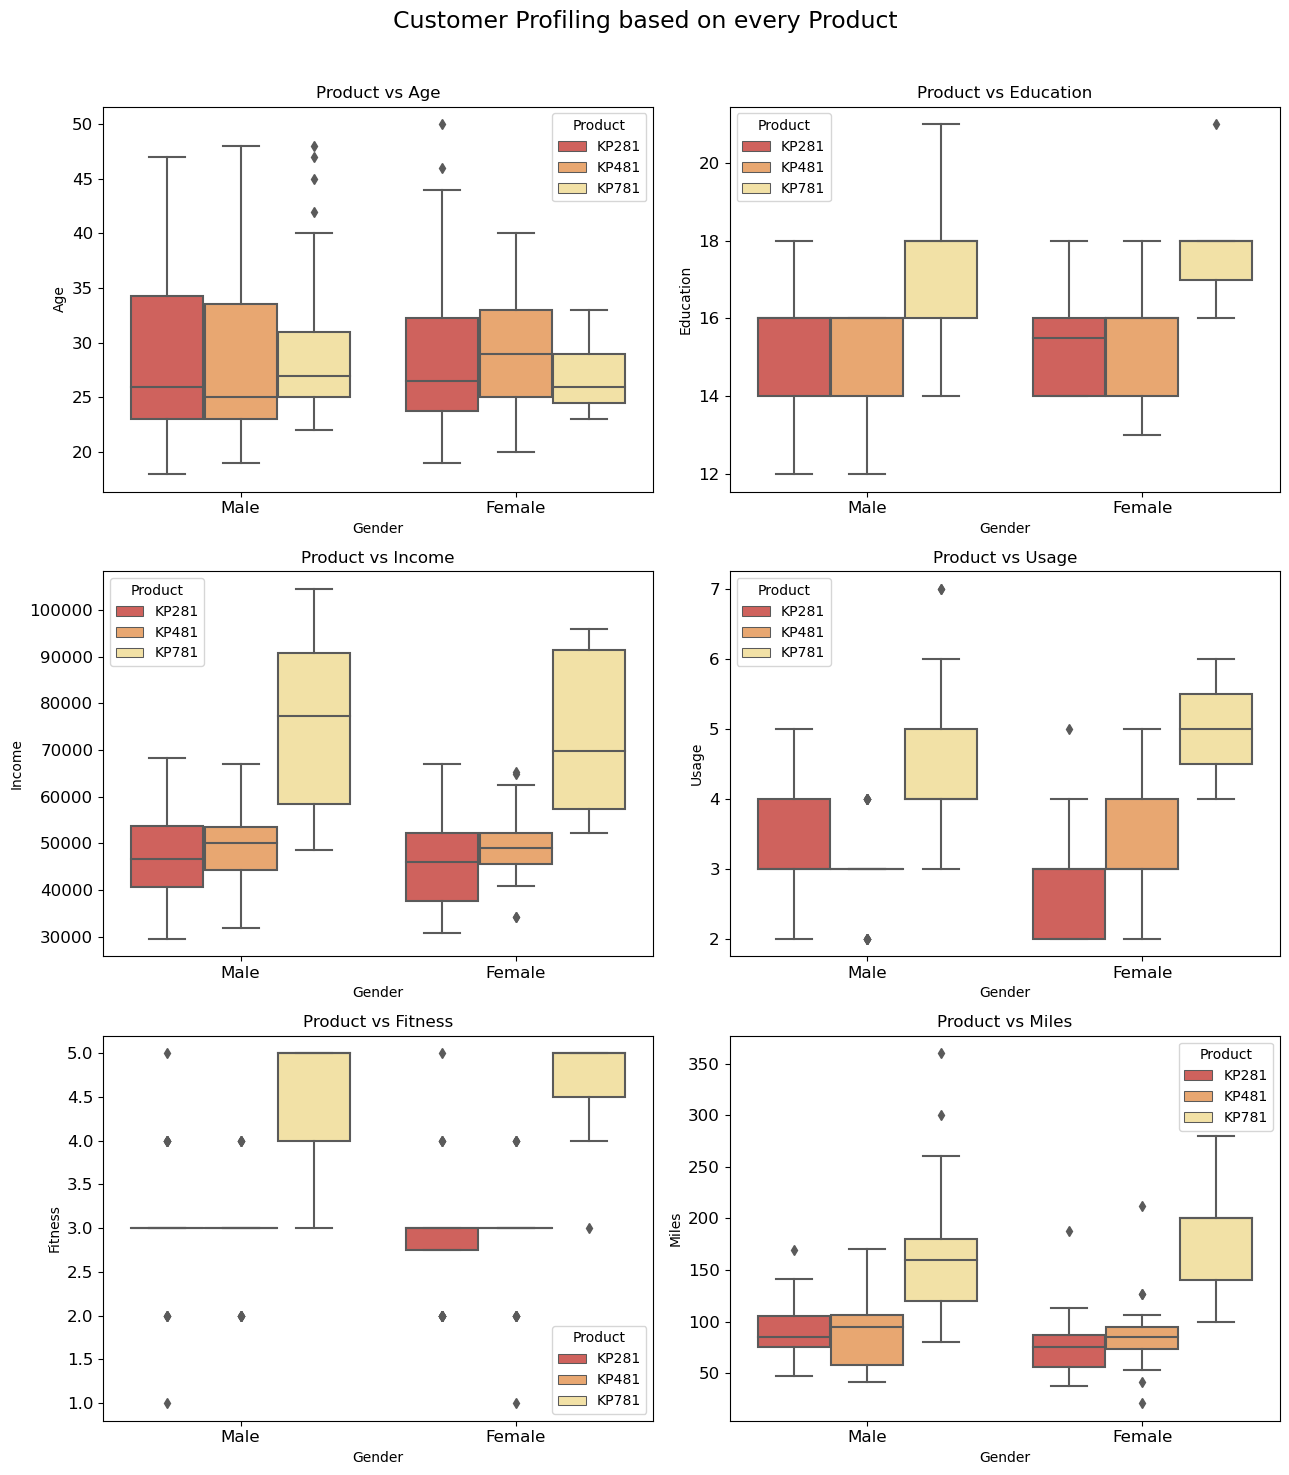

In [38]:
fig,axes = plt.subplots(3,2,figsize=(13,15))
plt.suptitle('Customer Profiling based on every Product\n\n', fontsize=17)
axes = axes.flatten()

for i, column in enumerate(continuous_var):
    sns.boxplot(y=aerofit_data[column], x =aerofit_data['Gender'],ax=axes[i], hue=aerofit_data['Product'])
    axes[i].set_title(f'Product vs {column.capitalize()}')
    axes[i].tick_params(axis='y',labelsize=12)
    axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

# INSIGHTS & OBSERVATIONS -
Customer profiling for each product involves creating a detailed description and understanding of the target customers who are likely to purchase that specific product. It helps in identifying the characteristics, preferences, and behaviors of the target audience for effective marketing and sales strategies.

Based on above analysis: 

- Probability of purchase of KP281 = 44% 
- Probability of purchase of KP481 = 33%
- Probability of purchase of KP781 = 

6.2 Customer Profile for KP281 Tread mill:
- Age of customer mainly between 18 to 35 years with few between 35 to 50 years
- Education level of customer 13 years and above
- Annual Income of customer below USD 60,000
- Weekly Usage - 2 to 4 times
- Fitness Scale - 2 to 4
- Weekly Running Mileage - 50 to miles 
6.3 Customer Profile for KP481 Treadmill:
- Age of customer mainly between 18 to 35 years with few between 35 to 50 years
- Education level of customer 13 years and above
- Annual Income of customer between USD 40,000 to USD 80,000
- Weekly Usage - 2 to 4 times
- Fitness Scale - 2 to 4

- Weekly Running Mileage to 200 miles 6.4 Customer Profile f or KP781 Treadmill:
- Gender - Male
- Age of customer between 18 to 35 years
- Education level of customer 15 years and above
- Annual Income of customer USD 80,000 and above
- Weekly Usage - 4 to 7 times
- Fitness Scale - 3 to 5
- Weekly Running Mil effectiveness

# Recommendations -
Based on the analysis of the provided data, here are some recommendations :

1. Marketing Strategy: 

Focus on targeting customers with higher fitness levels by promoting the benefits of using fitness equipment regularly. Emphasize how regular usage can contribute to improving fitness and overall health.
Based on the provided analysis, it would be beneficial to focus marketing efforts for KP281 towards females and lower-income customers. This is because the analysis showed a positive correlation between usage and fitness level, indicating that individuals who use fitness equipment more frequently tend to have higher fitness levels. By targeting females, the marketing efforts can communicate the benefits of using the KP281 to achieve their fitness goals. In addition, targeting lower-income customers aligns with the notable association between income and education, suggesting that customers with lower incomes may have pursued less education and may prefer a more affordable treadmill like the KP281.

On the other hand, for the KP781, it is recommended to target higher-income and possibly male customers. The analysis revealed a positive correlation between income and both education and miles covered. This suggests that customers with higher incomes may have pursued more education and might prefer treadmills that offer longer mileage, such as the KP781. By targeting higher-income customers, the marketing efforts can highlight the advanced features, longer mileage, and potentially higher quality of the KP781 to appeal to their preferences and desire for a high-performance treadmill.

2. Product Development: 

Consider developing treadmill models that offer longer mileage for customers with higher incomes. This can cater to their preference for treadmills that allow them to cover more distance and potentially attract this customer segment. Use the data on product preferences and conditional probabilities to guide product development. If KP281 is popular among certain groups, consider enhancing its features or affordability for wider appeal. For KP781, explore ways to cater to higher-income customers’ fitness needs.

3. Pricing Strategy: 

Adjust pricing strategies accordingly based on the income levels of the target customer segment. Higher-income individuals may be willing to pay more for advanced treadmill features and better overall quality.

4. Education Campaign: 

Develop educational content to promote the link between education, income, and fitness. Highlight how higher education levels can lead to higher incomes and a greater likelihood of engaging in fitness activities. Show how using treadmills can be a part of an overall active and healthy lifestyle.

5. Customer Segmentation: 

Segment the customer base based on their activity lifestyles, income levels, and education levels. This will help tailor marketing messages and product offerings to each segment's specific needs and preferences.

6. Partnerships: 

Collaborate with fitness influencers or organizations that target customers with higher fitness levels or higher incomes. This can help to expand brand reach and credibility among the target audience.

7. Customer Insights:

Continuously collect customer feedback and usage data to gain insights into customer preferences, needs, and satisfaction levels. This will enable a more customer-centric approach to product development and marketing efforts.

8. Continuous Improvement: 

Regularly review and analyze data to identify any emerging trends or changes in customer behavior. This will allow for timely adjustments to marketing strategies and product offerings, ensuring the company stays aligned with customer needs and preferences.

Overall, these recommendations focus on targeting specific customer segments, aligning product development with customer preferences, and utilizing education and marketing tactics to drive sales and brand loyalty.

To create customer profiles for each product, we can follow these steps:

1. Defining the product: 
Clearly identify and describe the specific product for which we want to create customer profiles.

2. Conduct market research: 
Gather data and insights about the market, industry, and customer demographics related to the product. This can include conducting surveys, analyzing customer feedback, studying competitors, and researching industry trends.

3. Identify target audience: 
Based on the product's features, benefits, and value propositions, define the target audience that is most likely to have a need or desire for the product. Consider demographic factors like age, gender, location, income, profession, and lifestyle.

4. Evaluate customer characteristics: 
Understand the psychographic factors of target audience, including their interests, hobbies, values, attitudes, opinions, and buying behaviors. This can be done through interviews, focus groups, or analyzing existing customer data.

5. Create customer profiles: 
Compile the information gathered to create detailed customer profiles or buyer personas for each product. Include demographics, psychographics, motivations, challenges, goals, buying habits, and preferred communication channels.

6. Use customer profiles for marketing: 
Utilize the customer profiles to tailor marketing messages, content, and channels to effectively reach and engage the target audience. This allows for better product positioning, personalized marketing campaigns, and improved customer acquisition and retention rates.